In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset
import cv2

In [3]:
#data Preprocess

TrainSet_X,TrainSet_Y,TestSet_X,TestSet_Y,classes = load_dataset()
#209 train example
#50 test example
# 0 > non cat
# 1 > cat
#print(TrainSet_Y.shape)

mTrain = TrainSet_X.shape[0]
mTest = TestSet_X.shape[0]
px = TrainSet_X.shape[1]

#Flatting the images
TrainSet_X_Flatten = TrainSet_X.reshape(mTrain, -1).T
TestSet_X_Flatten = TestSet_X.reshape(mTest, -1).T

#normalizing
normalTrainX = TrainSet_X_Flatten/255
normalTestX = TestSet_X_Flatten / 255

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def initializeWithZeros(shape):
    w = np.zeros((shape,1))
    b = 0
    return w,b


In [5]:
def forwardPropagation(X,Y,w,b):
    m = X.shape[1]
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    cost = -1/m *( np.sum(Y*np.log(A) - (1-Y) * np.log(1-A) ) )
    dw = (1/m) * (np.dot(X,(A-Y).T))
    db = (1/m) * (np.sum(A-Y))
    cost = np.squeeze(cost)
    gradient = {"dw":dw, "db":db}
    return cost,gradient

In [6]:
def optimization(X,Y,w,b, num_iterations, learning_rate):
    costs=[]
    for i in range(num_iterations):
        cost,gradient = forwardPropagation(X,Y,w,b);
        dw = gradient['dw']
        db = gradient['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
        if i % 500 == 0:
            print("Cost at iteration %i, is %f" %(i,cost))
    
    parameters = {'w':w,'b':b}
    gradient = {"dw":dw, "db":db}
    return parameters, costs, gradient

In [7]:
def prediction(X,w,b):
    m = X.shape[1]
    Y_predicted = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(m):
        if(A[0,i] >= 0.5):
            Y_predicted[0,i] = 1
        else:
            Y_predicted[0,i] = 0
    return Y_predicted;

In [8]:
def logRegModel(X_train, Y_train, X_test, Y_test, num_iterations = 5000, learning_rate = 0.001):
    m = X_train.shape[0]
    
    w,b = initializeWithZeros(m)
    parameters, costs, gradient = optimization(X_train,Y_train,w,b, num_iterations, learning_rate)
    w = parameters['w']
    b = parameters['b']
    
    Y_Train_Prediction = prediction(X_train,w,b)
    Y_Test_Prediction = prediction(X_test,w,b)
    trainAcc = 100-np.mean(np.abs(Y_Train_Prediction-Y_train))*100
    testAcc = 100-np.mean(np.abs(Y_Test_Prediction-Y_test))*100
    print('Train Accuracy: ' + str(trainAcc))
    print('Test Accuracy: ' + str(testAcc))    
  
    return w,b,costs

In [9]:
w,b,costs = logRegModel(normalTrainX,TrainSet_Y,normalTestX,TestSet_Y)


Cost at iteration 0, is -0.215572
Cost at iteration 500, is 0.034958
Cost at iteration 1000, is 0.026305
Cost at iteration 1500, is 0.021312
Cost at iteration 2000, is 0.017811
Cost at iteration 2500, is 0.015150
Cost at iteration 3000, is 0.013032
Cost at iteration 3500, is 0.011292
Cost at iteration 4000, is 0.009832
Cost at iteration 4500, is 0.008590
Train Accuracy: 96.65071770334929
Test Accuracy: 74.0


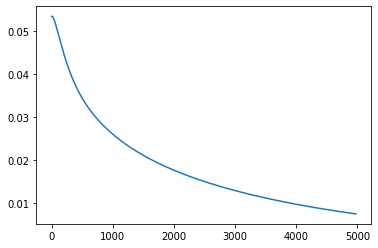

In [10]:
costs = np.array(costs[20:-1])
plt.plot(costs)
plt.show()


In [19]:
imagePath = './images/cat3.jpg'
img = cv2.imread(imagePath)
image = cv2.resize(img, dsize=(px, px))
imageArr = image.reshape((1,px*px*3)).T
cv2.imshow("image",image)
cv2.waitKey(0)
print('cat' if prediction(imageArr,w,b)[0][0] == 1 else 'Not a cat')

cat
